# Modeling for predicting the condo size
## Neural Network
In the first part of the modeling, we want to use neural network of fully connected layers. We will try different layers, regularization methods, optimization methods, training rounds.

I made a change to the data, put studio as a seperate category.
changed 31-50 in age of bnuilding to 45. Changed 0-5 to 2.5, changed 6-10 to 8, changed 11-15 to 13, 16-30 to 23, 31-50 to 45.

In [1]:
import pandas as pd
import numpy as np

#load the data
df = pd.read_csv('out2.csv',header=0,index_col=0)
tar = pd.read_csv('output.csv',header=0,index_col=0)

#use 1000 dollor as an unit
tar/=1000

In [2]:
#replace the missing value withe -1
df.fillna(0,inplace=True)
df.isnull().any()
df.dtypes
tar.dtypes

Pricepersqm    float64
dtype: object

In [3]:
# set the train set and test set
train=df[:2500]
test=df[2500:]
train_tar=tar[:2500]
test_tar=tar[2500:]

#normalize the training data
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

#set the validation set
train_par=train[:2100]
train_par_tar=train_tar[:2100]
val=train[2100:]
val_tar=train_tar[2100:]

In [4]:
from keras import models
from keras import layers

n=train_par.shape[1]
model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(n,)))
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

train_par.astype('float64')
train_par_tar.astype('float64')
val.astype('float64')
val_tar.astype('float64')
history=model.fit(train_par,train_par_tar,epochs=50,batch_size=20,validation_data=(val,val_tar))

Epoch 1/50
105/105 [==============================] - 1s 3ms/step - loss: 15.6332 - mae: 2.8181 - val_loss: 9.9230 - val_mae: 2.0078
Epoch 2/50
105/105 [==============================] - 0s 1ms/step - loss: 5.1368 - mae: 1.6917 - val_loss: 9.4855 - val_mae: 1.8821
Epoch 3/50
105/105 [==============================] - 0s 1ms/step - loss: 4.5914 - mae: 1.6083 - val_loss: 8.6471 - val_mae: 1.6663
Epoch 4/50
105/105 [==============================] - 0s 2ms/step - loss: 4.4128 - mae: 1.5553 - val_loss: 7.9795 - val_mae: 1.6032
Epoch 5/50
105/105 [==============================] - 0s 2ms/step - loss: 4.1381 - mae: 1.5222 - val_loss: 8.6851 - val_mae: 1.6574
Epoch 6/50
105/105 [==============================] - 0s 1ms/step - loss: 4.0562 - mae: 1.4960 - val_loss: 8.2373 - val_mae: 1.6129
Epoch 7/50
105/105 [==============================] - 0s 2ms/step - loss: 3.9528 - mae: 1.4839 - val_loss: 8.4776 - val_mae: 1.6665
Epoch 8/50
105/105 [==============================] - 0s 1ms/step - loss: 3

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


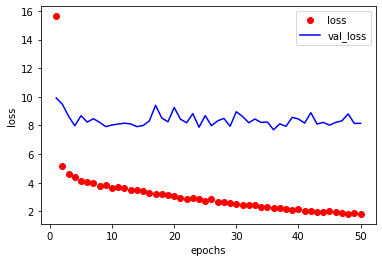

In [5]:
#Draw the mse and mae
import matplotlib.pyplot as plt

print(history.history.keys())

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


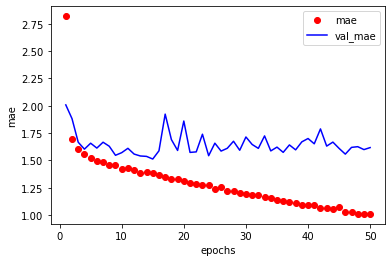

In [6]:
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [7]:
# we can try another model with fewer nodes and layers
n=train_par.shape[1]
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(n,)))
model.add(layers.Dense(64,activation='relu'))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


# at this time we can 
history=model.fit(train_par,train_par_tar,epochs=200,batch_size=1,validation_data=(val,val_tar),verbose=0)

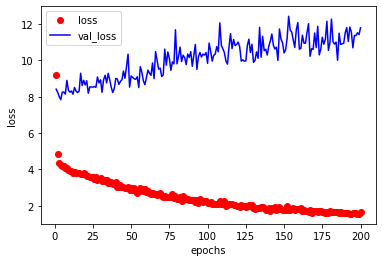

In [8]:
dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

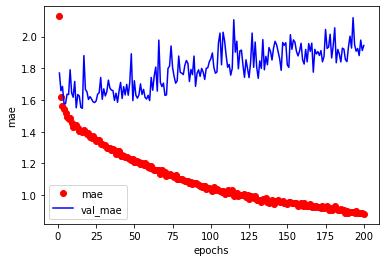

In [9]:
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()

In [10]:
min(val_mae)

1.5471783876419067

It can be seen that the mae value of the validation data set has been rising, indicating that the model is overfitted very quickly. So we add dropout layers into the model.

In [11]:
# we can try another model with fewer nodes and layers
n=train_par.shape[1]
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])


# at this time we can 
history=model.fit(train_par,train_par_tar,epochs=150,batch_size=1,validation_data=(val,val_tar),verbose=0)

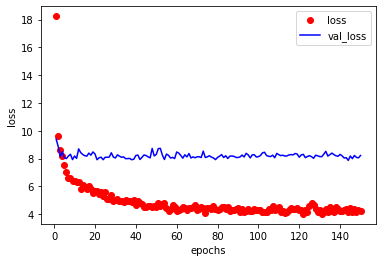

In [19]:
dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

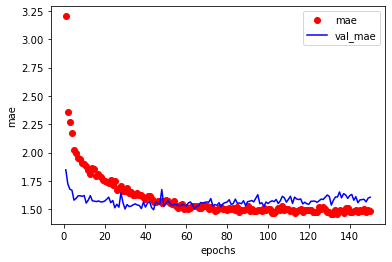

1.4961671829223633

In [20]:
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()
min(val_mae)

In [21]:
print('the index of smallest mae',val_mae.index(min(val_mae)))
print('the index of smallest mse',val_loss.index(min(val_loss)))

the index of smallest mae 43
the index of smallest mse 143


The overfitting was significantly reduced by dropout, the lowest mae occured on the 31 epoch(For different trials this may be different, because the randomness ofoptimization). So, we use all the data from the training set to train the model again.

In [32]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(train,train_tar,epochs=31,batch_size=1,verbose=0)

result=model.evaluate(test,test_tar)

13/13 [==============================] - 0s 1ms/step - loss: 3.7097 - mae: 1.4891


In [31]:
result

[3.5392603874206543, 1.465431571006775]

In [36]:
print(np.mean(tar))
1.46543/10.305306

Pricepersqm    10.305306
dtype: float64


0.14220150279865537

From the result, the difference between our predicted price and the actual price is about 1,500 dollars. It is 14.22% of the average house price.

Then we try a smaller network with less neurons.

13/13 [==============================] - 0s 831us/step - loss: 3.8301 - mae: 1.5355


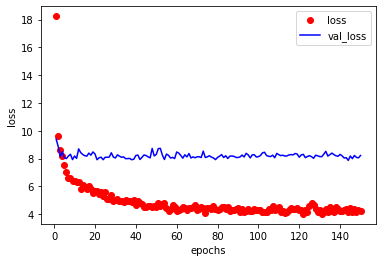

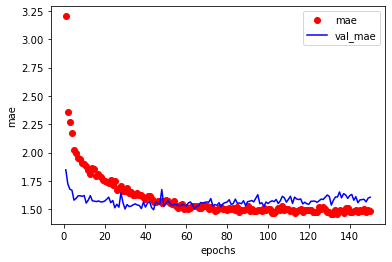

TypeError: '<' not supported between instances of 'list' and 'str'

In [22]:
# 32 neurons each layers
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(train,train_tar,epochs=200,batch_size=1,verbose=0)

result=model.evaluate(test,test_tar)

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

# draw the mse, also seen as the loss function
plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# draw the mae, also seen as the loss function
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()


In [23]:
min(val_mae)

1.4961671829223633

13/13 [==============================] - 0s 772us/step - loss: 4.5593 - mae: 1.6906


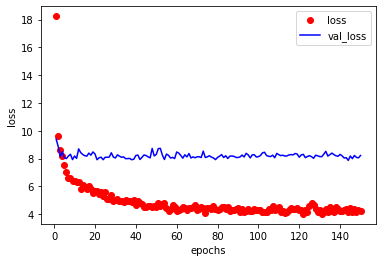

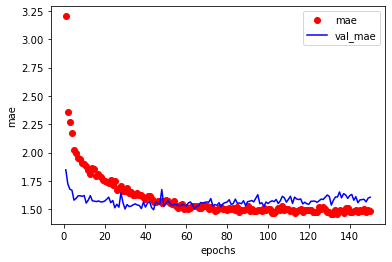

the smallest validation mae 1.4961671829223633


In [24]:
# 16 neurons each layers
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(train,train_tar,epochs=200,batch_size=1,verbose=0)

result=model.evaluate(test,test_tar)

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

# draw the mse, also seen as the loss function
plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# draw the mae, also seen as the loss function
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()
print('the smallest validation mae',min(val_mae))

13/13 [==============================] - 0s 831us/step - loss: 4.8247 - mae: 1.7170


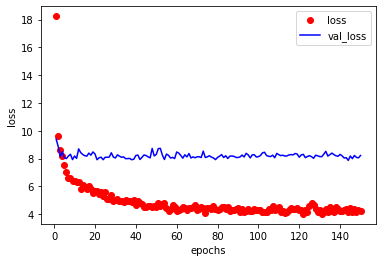

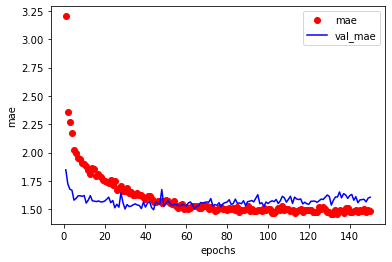

the smallest validation mae 1.4961671829223633


In [25]:
# 8 neurons each layers
model=models.Sequential()
model.add(layers.Dense(8,activation='relu',input_shape=(n,)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dropout(0.4))
model.add((layers.Dense(1)))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
model.fit(train,train_tar,epochs=200,batch_size=1,verbose=0)

result=model.evaluate(test,test_tar)

dic=history.history
loss=dic['loss']
mae=dic['mae']
val_loss=dic['val_loss']
val_mae=dic['val_mae']
epo=[i for i in range(1,len(loss)+1)]

# draw the mse, also seen as the loss function
plt.plot(epo,loss,'ro',label='loss')
plt.plot(epo,val_loss,'b',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# draw the mae, also seen as the loss function
plt.plot(epo,mae,'ro',label='mae')
plt.plot(epo,val_mae,'b',label='val_mae')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()
plt.show()
print('the smallest validation mae',min(val_mae))